In [1]:
#Import libraries
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Setting the variables for my initial data
mean = .5
std = mean/6
datapoints = 20000

In [3]:
#Function to get a list with a gaussian distribution
def get_gaussian_dist(mean,std,datapoints):
    gauss_lst = []
    while len(gauss_lst) < datapoints:
        sample = random.gauss(mean, std)
        if sample >= 0 and sample <= 1:
            gauss_lst.append(sample)
    return gauss_lst    

#Function to calculate the multiplier for water based on 3 regions
def get_waterfall(datapoints):
    pop = [-.02,0,.02]
    wei = [3,3,3]    
    lst = []
    for points in range(datapoints):
        multi = random.choices(pop,wei,k=1)
        lst.append(multi[0])
    return(lst)

In [49]:
def make_dataframe(mean,std,datapoints,plant,base,multi):
    gauss_1 = get_gaussian_dist(mean,std,datapoints)
    gauss_2 = get_gaussian_dist(mean,std,datapoints)
    gauss_3 = get_gaussian_dist(mean,std,datapoints)
    gauss_4 = get_gaussian_dist(mean,std,datapoints)
    water_1 = get_waterfall(datapoints)
    water_2 = get_waterfall(datapoints)
    dict = {'Base_gauss_1':gauss_1,'Sun_gauss_1':gauss_2,'Base_gauss_2':gauss_3,'Sun_gauss_2':gauss_4,
            'Water_multi_1':water_1,'Water_multi_2':water_2}
    df=pd.DataFrame(dict)
    df['var_1'] = (((df['Base_gauss_1'] * multi) + base) + df['Sun_gauss_1']) * (df['Water_multi_1'] + 1)
    df['var_2'] = (((df['Base_gauss_2'] * multi) + base) + df['Sun_gauss_2']) * (df['Water_multi_2'] + 1)
    df['plant_type'] = plant
    return(df)

In [50]:
plant_1 = make_dataframe(mean,std,datapoints,'plant_1',9.9,1)
plant_2 = make_dataframe(mean,std,datapoints,'plant_2',10.1,1)
plant_3 = make_dataframe(mean,std,datapoints,'plant_3',9.8,1.4)

In [51]:
fake_iris = pd.concat([plant_1,plant_2,plant_3])

In [52]:
fake_iris.sample(10)

,Base_gauss_1,Sun_gauss_1,Base_gauss_2,Sun_gauss_2,Water_multi_1,Water_multi_2,var_1,var_2,plant_type
11673,0.441005,0.554558,0.485475,0.598842,-0.02,-0.02,10.752525,10.856936,plant_3
14115,0.735176,0.648000,0.538850,0.452617,-0.02,0.02,11.253512,11.313296,plant_2
2445,0.644854,0.453493,0.503327,0.405001,0.00,-0.02,11.156289,10.691466,plant_3
1445,0.435390,0.553205,0.510523,0.431041,-0.02,-0.02,10.866822,10.820734,plant_2
14591,0.352609,0.652402,0.529132,0.560845,-0.02,0.02,10.686910,11.209777,plant_1
19806,0.442294,0.563773,0.570864,0.368579,0.02,0.02,11.328188,11.260231,plant_2
18070,0.622419,0.457324,0.326248,0.422376,0.00,0.02,10.979743,10.861597,plant_1
8735,0.739494,0.437980,0.534416,0.435468,0.02,-0.02,11.498737,10.763977,plant_3
13236,0.491936,0.551395,0.513474,0.409835,-0.02,0.00,10.920464,11.023309,plant_2
1166,0.540728,0.443830,0.426277,0.585247,-0.02,0.02,10.666867,11.129755,plant_1


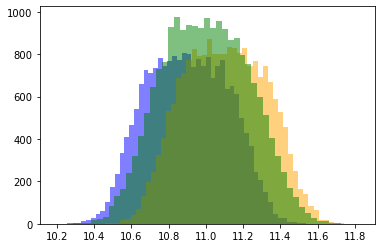

In [53]:
plt.hist(plant_1['var_1'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_1'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_1'], bins = 50, color='green',alpha=.5);

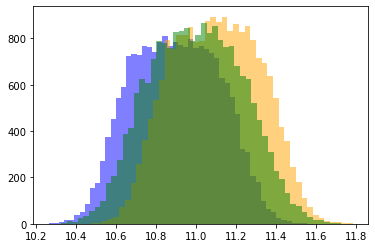

In [54]:
plt.hist(plant_1['var_2'], bins = 50, color='blue',alpha=.5);
plt.hist(plant_2['var_2'], bins = 50, color='orange',alpha=.5);
plt.hist(plant_3['var_2'], bins = 50, color='green',alpha=.5);

In [19]:
plant_3.sample(5)

,Base_gauss,Sun_gauss,Water_multi,var_1,plant_type
322,0.493576,0.488536,0.00,14.899542,plant_1
5698,0.341562,0.527258,0.00,14.725446,plant_1
17662,0.448877,0.521753,0.02,15.167584,plant_1
14877,0.604977,0.318673,-0.02,14.587928,plant_1
11919,0.590805,0.575342,-0.02,14.820020,plant_1


In [30]:
gauss_1 = get_gaussian_dist(mean,std,datapoints)
gauss_2 = get_gaussian_dist(mean,std,datapoints)
water = get_waterfall(datapoints)

dict = {'Base_Gauss':gauss_1,'Sun_gauss':gauss_2,'Water_multi':water}
fake_iris=pd.DataFrame(dict)

In [ ]:
fake_iris.sample(5)

In [31]:
fake_iris['water_1_base'] = fake_iris['Water_multi'] + 1
fake_iris['water_2_base'] = fake_iris['Water_multi'] + 1
fake_iris['water_3_base'] = fake_iris['Water_multi'] + 1

In [32]:
fake_iris['plant_1_base'] = fake_iris['Base_Gauss'] + 9.9
fake_iris['plant_2_base'] = fake_iris['Base_Gauss'] + 10.1
fake_iris['plant_3_base'] = (fake_iris['Base_Gauss'] * 1.4) + 9.8

In [33]:
fake_iris['var_1'] = (fake_iris['plant_1_base'] + fake_iris['Sun_gauss']) * fake_iris['water_1_base']
fake_iris['var_2'] = (fake_iris['plant_2_base'] + fake_iris['Sun_gauss']) * fake_iris['water_2_base']
fake_iris['var_3'] = (fake_iris['plant_3_base'] + fake_iris['Sun_gauss']) * fake_iris['water_3_base']

In [ ]:
fake_iris.sample(5)

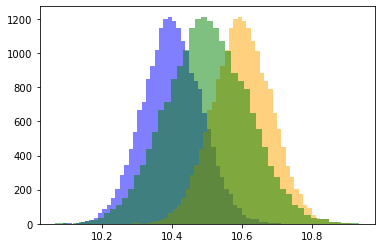

In [34]:
plt.hist(fake_iris['plant_1_base'], bins = 50, color='blue',alpha=.5);
plt.hist(fake_iris['plant_2_base'], bins = 50, color='orange',alpha=.5);
plt.hist(fake_iris['plant_3_base'], bins = 50, color='green',alpha=.5);

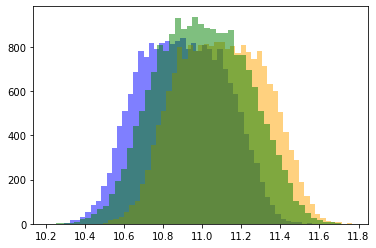

In [36]:
plt.hist(fake_iris['var_1'], bins = 50, color='blue',alpha=.5);
plt.hist(fake_iris['var_2'], bins = 50, color='orange',alpha=.5);
plt.hist(fake_iris['var_3'], bins = 50, color='green',alpha=.5);